In [62]:
import os
os.chdir('/rds/general/user/ma11115/home/Geom3D/Geom3D/')
#os.chdir('C:/Users/ma11115/OneDrive - Imperial College London/Geom3d/Geom3D/')

config loaded from /rds/general/user/ma11115/home/Geom3D/Geom3D/training/SchNet_target_80K_TEST_5e4lr/
y_pred tensor([[-9.0663]], device='cuda:0')
y_true tensor(-8.7690, device='cuda:0')
y_pred_cpu tensor([[-9.4689]])
train_idx:  [47044 44295 74783 ... 77925 18116 14762]
valid_idx:  [39698 66692  7139 ... 52300 56176  3346]
test_idx:  [61260 28261 49228 ... 76820   860 15795]
pymodel device cuda:0


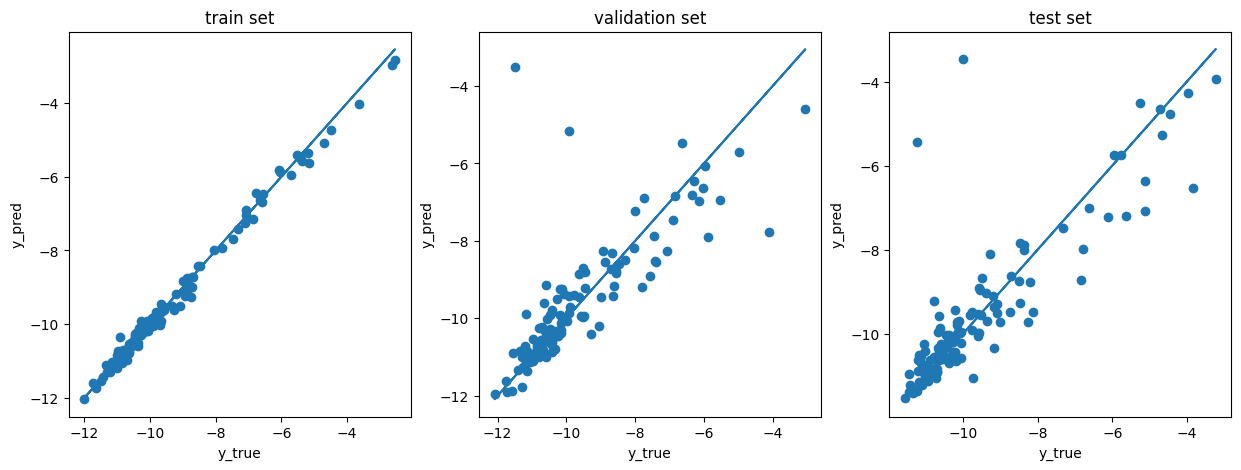

In [8]:
from geom3d.test_train import *
import torch
import copy
chkpt_path = os.getcwd()+"/training/SchNet_target_80K_TEST_5e4lr/epoch=91-val_loss=0.56-other_metric=0.00.ckpt"
config_dir = os.getcwd()+"/training/SchNet_target_80K_TEST_5e4lr/"
torch.use_deterministic_algorithms(False)
os.environ['CUDA_LAUNCH_BLOCKING'] = str(1)
def plot_training_results(chkpt_path, config_dir):
    config = read_config(config_dir)
    np.random.seed(config["seed"])
    torch.cuda.manual_seed_all(config["seed"])
    torch.manual_seed(config["seed"])
    config["device"] = "cuda:0" if torch.cuda.is_available() else "cpu"
    pymodel = Pymodel.load_from_checkpoint(chkpt_path)#,map_location={"cuda:0":"cpu"})
    pymodel.freeze()
    
    #pymodel.to('cpu')

    #config["device"] = "cpu" #"cuda" if torch.cuda.is_available() else "cpu"
    
    np.random.seed(config["seed"])
    torch.cuda.manual_seed_all(config["seed"])
    dataset = load_data(config)
    print('y_pred', pymodel(dataset[0].to(config["device"])))
    print('y_true', dataset[0].y)
    pymode_cpu = copy.deepcopy(pymodel).to('cpu')
    print('y_pred_cpu', pymode_cpu(dataset[0].to('cpu')))
    

    train_loader, val_loader, test_loader = train_val_test_split(
        dataset, config=config
    )
    %matplotlib inline
    import matplotlib.pyplot as plt
    print("pymodel device", pymodel.device)
    fig, axis = plt.subplots(1,3, figsize=(15,5))
    for id,loader in enumerate([train_loader, val_loader, test_loader]):
        axis[id].set_ylabel('y_pred')
        axis[id].set_xlabel('y_true')
        
        for x in loader:
            with torch.no_grad():
                Y_pred = pymodel(x.to(config["device"]))
            break
        axis[id].scatter( x.y.to('cpu'),Y_pred.to('cpu').detach(),)
        axis[id].plot(x.y.to('cpu'),x.y.to('cpu'))
        axis[id].set_title(['train set', 'validation set', 'test set'][id])
    plt.show()
    return train_loader,dataset
train_loader,dataset = plot_training_results(chkpt_path, config_dir)


In [241]:
%run src/geom3d/test_train.py --config_dir /training/SchNet_target_80K_TEST_5e4lr

config loaded from /rds/general/user/ma11115/home/Geom3D/Geom3D/training/SchNet_target_80K_TEST_5e4lr


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [72]:
os.chdir('/rds/general/user/ma11115/home/Geom3D/Geom3D/')

%run src/geom3d/fragencoding.py --config_dir /training/SchNet_target_80K_TEST_5e4lr

config loaded from /rds/general/user/ma11115/home/Geom3D/Geom3D/training/SchNet_target_80K_TEST_5e4lr
dataset not found


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


KeyboardInterrupt: 

In [ ]:
os.getcwd()